In [2]:
import pandas as pd

# Загрузка данных из Excel
df = pd.read_excel('../data/Tableau Superstore.xlsx')

# Вывод первых строк
print("Первые 5 строк:")
df.head()

Первые 5 строк:


,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2013-01-03,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,...,2013-01-07,Standard Class,Texas,Paper,0.2,1,$6,0.34,2,$16
1,Office Supplies,Naperville,United States,Phillina Ober,Avery,2013-01-04,CA-2011-112326,60540,Avery 508,Central,...,2013-01-08,Standard Class,Illinois,Labels,0.2,1,$4,0.36,3,$12
2,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2013-01-04,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,...,2013-01-08,Standard Class,Illinois,Storage,0.2,1,-$65,-0.24,3,$273
3,Office Supplies,Naperville,United States,Phillina Ober,GBC,2013-01-04,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,...,2013-01-08,Standard Class,Illinois,Binders,0.8,1,-$5,-1.55,2,$4
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2013-01-05,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,...,2013-01-12,Standard Class,Pennsylvania,Art,0.2,1,$5,0.25,3,$20


In [4]:
# Общая информация о данных
print("Информация о данных:")
df.info()

# Статистика по числовым столбцам
print("\nСтатистика по числовым данным:")
print(df.describe())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           9994 non-null   object        
 1   City               9994 non-null   object        
 2   Country            9994 non-null   object        
 3   Customer Name      9994 non-null   object        
 4   Manufacturer       9994 non-null   object        
 5   Order Date         9994 non-null   datetime64[ns]
 6   Order ID           9994 non-null   object        
 7   Postal Code        9994 non-null   int64         
 8   Product Name       9994 non-null   object        
 9   Region             9994 non-null   object        
 10  Segment            9994 non-null   object        
 11  Ship Date          9994 non-null   datetime64[ns]
 12  Ship Mode          9994 non-null   object        
 13  State              9994 non-null   object 

In [5]:
# Проверка на пропуски
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
Category             0
City                 0
Country              0
Customer Name        0
Manufacturer         0
Order Date           0
Order ID             0
Postal Code          0
Product Name         0
Region               0
Segment              0
Ship Date            0
Ship Mode            0
State                0
Sub-Category         0
Discount             0
Number of Records    0
Profit               0
Profit Ratio         0
Quantity             0
Sales                0
dtype: int64


In [6]:
# Уникальные значения в категориальных полях
cat_columns = df.select_dtypes(include='object').columns

for col in cat_columns:
    print(f"\nУникальные значения в '{col}':")
    print(df[col].unique())


Уникальные значения в 'Category':
['Office Supplies' 'Furniture' 'Technology']

Уникальные значения в 'City':
['Houston' 'Naperville' 'Philadelphia' 'Los Angeles' 'Athens' 'Henderson'
 'Huntsville' 'Laredo' 'Springfield' 'Dover' 'Bossier City'
 'Mount Pleasant' 'San Francisco' 'Newark' 'Roswell' 'Scottsdale'
 'Jonesboro' 'Westland' 'Smyrna' 'Miami' 'Las Vegas' 'Lafayette'
 'Alexandria' 'Rapid City' 'San Diego' 'New York City' 'Detroit'
 'Mission Viejo' 'Green Bay' 'Saint Petersburg' 'Seattle' 'Escondido'
 'Chesapeake' 'Romeoville' 'Linden' 'North Las Vegas' 'Columbia' 'Concord'
 'Dallas' 'Chicago' 'Lubbock' 'Arlington' 'Richmond' 'Woodstock'
 'Moreno Valley' 'El Paso' 'Medford' 'Columbus' 'Elmhurst' 'Wilmington'
 'Margate' 'Yonkers' 'Des Moines' 'Royal Oak' 'Denver' 'Roseville'
 'Huntington Beach' 'Logan' 'Jacksonville' 'Tampa' 'Raleigh' 'Lakeville'
 'Jackson' 'Burbank' 'Lakeland' 'Hamilton' 'Asheville' 'Knoxville'
 'Greensboro' 'Tucson' 'Portage' 'Delray Beach' 'Fresno' 'Pomona'
 'Al

In [7]:
# Преобразование дат
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Добавим новые признаки
df['Order Month'] = df['Order Date'].dt.month_name()
df['Order Year'] = df['Order Date'].dt.year

# Пример
print("\nПример новых признаков:")
df[['Order Date', 'Order Month', 'Order Year']].head()


Пример новых признаков:


,Order Date,Order Month,Order Year
0,2013-01-03,January,2013
1,2013-01-04,January,2013
2,2013-01-04,January,2013
3,2013-01-04,January,2013
4,2013-01-05,January,2013


In [ ]:
#Замена \xa0 на обычный пробел
df['Product Name'] = df['Product Name'].str.replace('\xa0', ' ')

In [16]:
#Преобразование в числовой тип и анализ выбросов
df['Profit'] = df['Profit'].str.replace('[,$]', '', regex=True).astype(float)

df['Sales'] = df['Sales'].str.replace('[,$]', '', regex=True).astype(float)

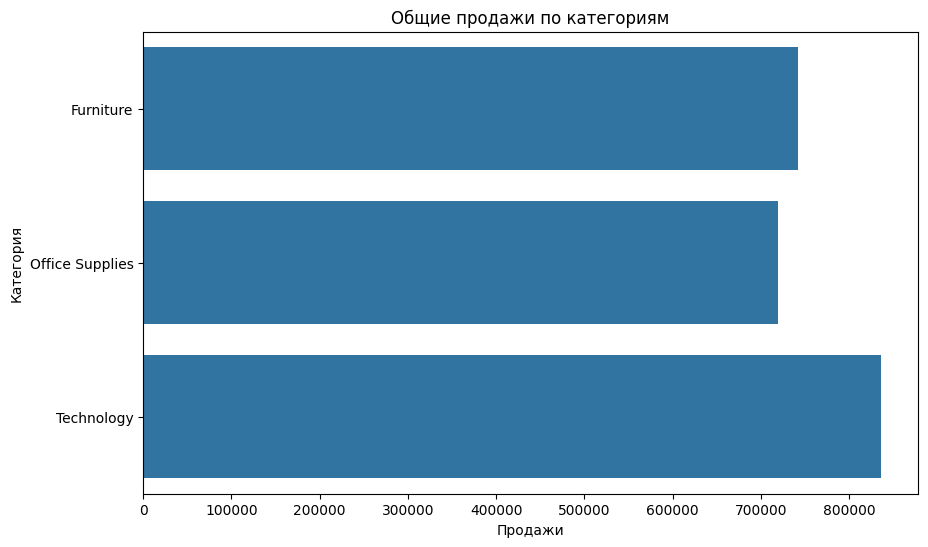

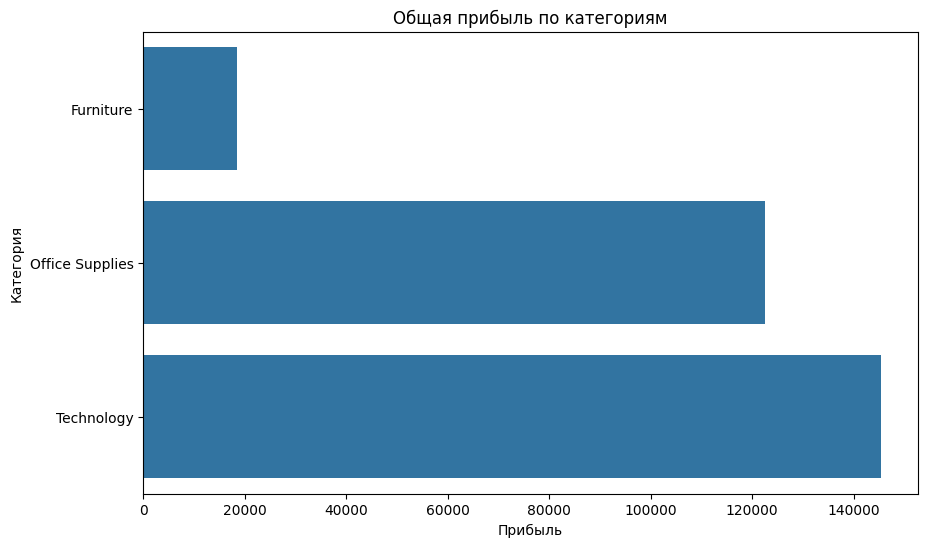

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Продажи по категориям
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Category', data=df.groupby('Category', as_index=False)['Sales'].sum(), estimator=sum)
plt.title('Общие продажи по категориям')
plt.xlabel('Продажи')
plt.ylabel('Категория')
plt.show()

# Прибыль по категориям
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Category', data=df.groupby('Category', as_index=False)['Profit'].sum(), estimator=sum)
plt.title('Общая прибыль по категориям')
plt.xlabel('Прибыль')
plt.ylabel('Категория')
plt.show()


Продажи и прибыль по регионам:
    Region     Sales    Profit
0  Central  501256.0   39719.0
1     East  678834.0   91521.0
2    South  391750.0   46721.0
3     West  725514.0  108386.0


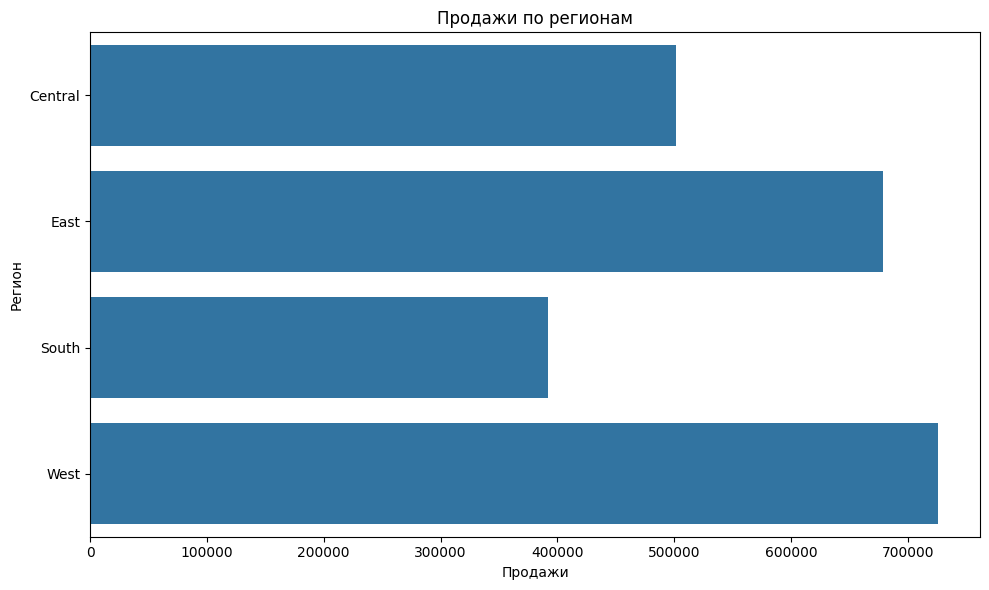

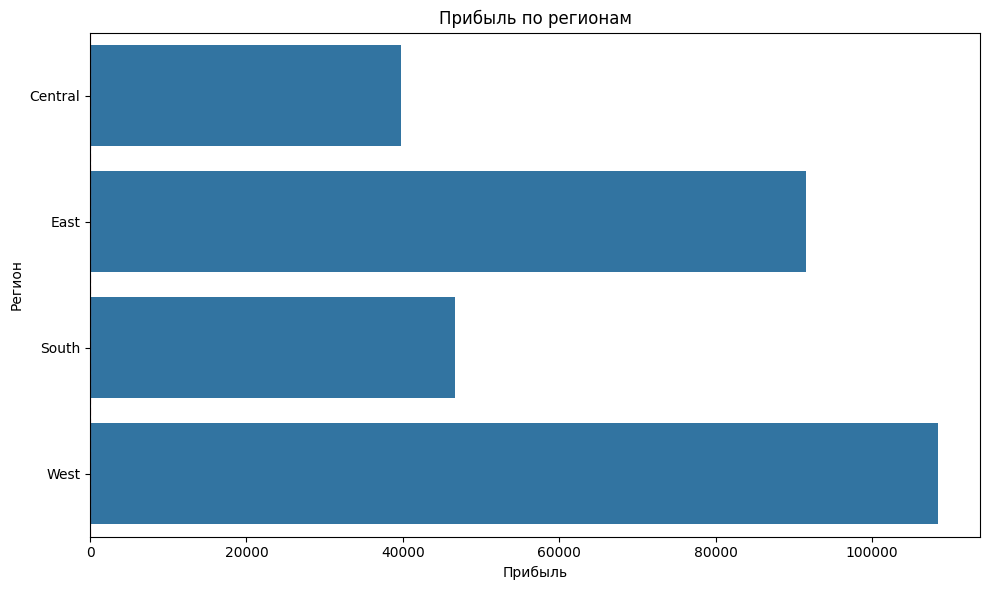

In [20]:
# Продажи и прибыль по регионам
region_sales = df.groupby('Region', as_index=False)[['Sales', 'Profit']].sum()
print("\nПродажи и прибыль по регионам:")
print(region_sales)

# График продаж по регионам
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Region', data=region_sales)
plt.title('Продажи по регионам')
plt.xlabel('Продажи')
plt.ylabel('Регион')
plt.tight_layout()
plt.show()

# График прибыли по регионам
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Region', data=region_sales)
plt.title('Прибыль по регионам')
plt.xlabel('Прибыль')
plt.ylabel('Регион')
plt.axvline(0, color='r', linestyle='--')  # Линия нулевой прибыли
plt.tight_layout()
plt.show()


Клиенты с наибольшим количеством заказов:
Customer Name
Emily Phan             17
Sally Hughsby          13
Erin Ashbrook          13
Patrick Gardner        13
Zuschuss Carroll       13
Chloris Kastensmidt    13
Joel Eaton             13
Noel Staavos           13
Rick Bensley           12
Resi Pölking           12
Name: Order ID, dtype: int64


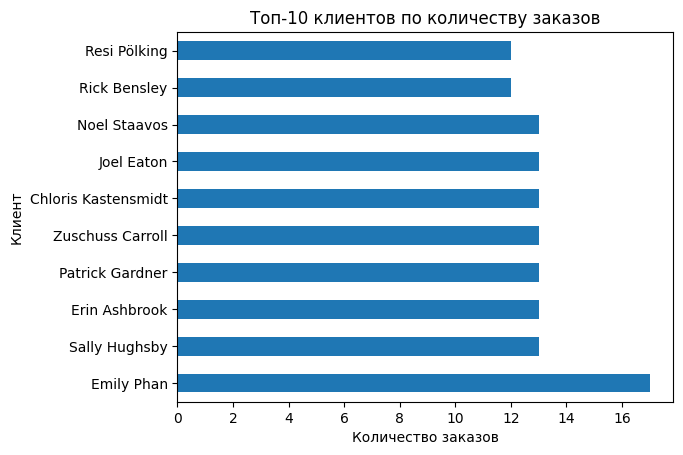

In [21]:
# Количество заказов на клиента
customer_orders = df.groupby('Customer Name')['Order ID'].nunique().sort_values(ascending=False).head(10)
print("\nКлиенты с наибольшим количеством заказов:")
print(customer_orders)

# График
customer_orders.plot(kind='barh', title='Топ-10 клиентов по количеству заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Клиент')
plt.show()

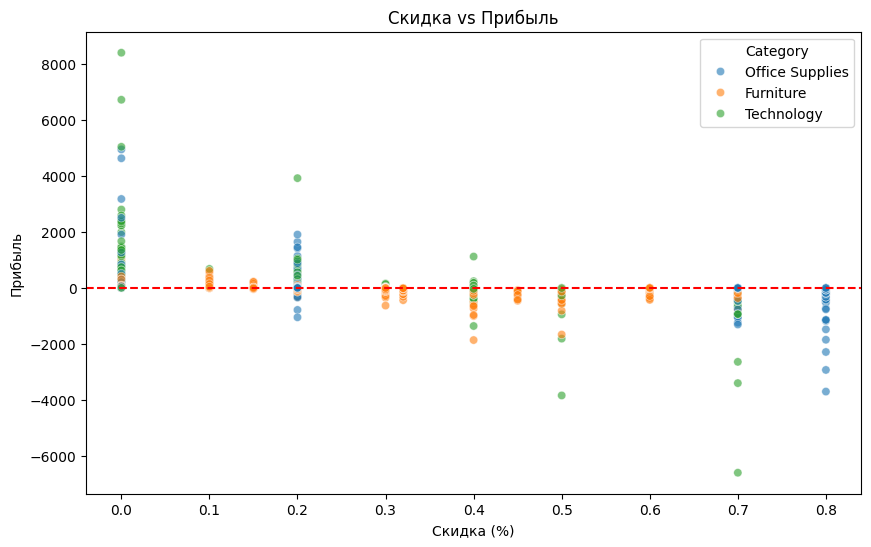

In [22]:
# Зависимость между скидкой и прибылью
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.6)
plt.title('Скидка vs Прибыль')
plt.xlabel('Скидка (%)')
plt.ylabel('Прибыль')
plt.axhline(0, color='r', linestyle='--')  # Линия нулевой прибыли
plt.show()

In [23]:
# Поиск убытков
losses = df[df['Profit'] < 0]
print("\nКоличество убыточных заказов:", len(losses))

# Топ-5 самых убыточных
print("\nТоп-5 убыточных записей:")
losses.sort_values(by='Profit').head(5)[['Product Name', 'Sales', 'Profit', 'Discount']]


Количество убыточных заказов: 1865

Топ-5 убыточных записей:


,Product Name,Sales,Profit,Discount
6278,Cubify CubeX 3D Printer Double Head Print,4500.0,-6600.0,0.7
9125,Cubify CubeX 3D Printer Triple Head Print,8000.0,-3840.0,0.5
804,GBC DocuBind P400 Electric Binding System,2178.0,-3702.0,0.8
7284,Lexmark MX611dhe Monochrome Laser Printer,2550.0,-3400.0,0.7
9663,Ibico EPK-21 Electric Binding System,1890.0,-2929.0,0.8


C:\Users\User\AppData\Local\Temp\ipykernel_15332\436719116.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



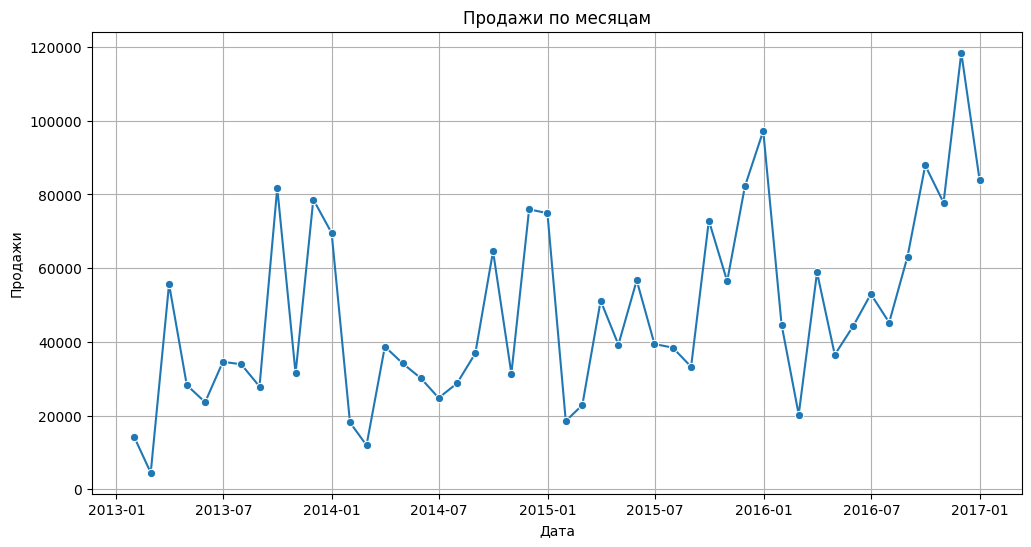

In [24]:
# Продажи по месяцам
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum().reset_index()

# График
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', data=monthly_sales, marker='o')
plt.title('Продажи по месяцам')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.grid(True)
plt.show()